In [170]:
from scipy import misc
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os
from skimage.io import imread_collection
from scipy import ndimage


#image path 
noisy_dir = 'Dataset/Noisy/*.jpg'

#creating a collection with the available images
noisy = imread_collection(noisy_dir)

In [171]:
# def rgb2gray(rgb):

#     r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
#     gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

#     return gray

#application of the Gaussian filter
def noisyTreatment(image):
    sigmaV = 50
    k = np.array([[0,0,0],[0,1,0],[0,0,0]])
    
    red = image[:, :, 0]
    gauss_denoised_red = ndimage.gaussian_filter(red, sigmaV)
    fred = scipy.ndimage.convolve(gauss_denoised_red, k, mode='constant', cval=0.0)
    laplace_sharpening_red = ndimage.laplace(fred)
    resultRed = red - laplace_sharpening_red
    
    
    green = image[:, :, 1]
    gauss_denoised_green = ndimage.gaussian_filter(green, sigmaV)
    fgreen = scipy.ndimage.convolve(gauss_denoised_green, k, mode='constant', cval=0.0)
    laplace_sharpening_green = ndimage.laplace(fgreen)
    resultGreen = green - laplace_sharpening_green

    blue = image[:, :, 2]
    gauss_denoised_blue = ndimage.gaussian_filter(blue, sigmaV)
    fblue = scipy.ndimage.convolve(gauss_denoised_blue, k, mode='constant', cval=0.0)
    laplace_sharpening_blue = ndimage.laplace(fblue)
    resultBlue = blue - laplace_sharpening_blue
    
    return np.dstack((resultRed, resultGreen, resultBlue))

#Laplacian
# def laplacianOperation(image):
#     red = image[:, :, 0]
#     fred = scipy.ndimage.convolve(laplace_sharpening_red, k, mode='constant', cval=0.0)

#     green = image[:, :, 1]
#     fgreen = scipy.ndimage.convolve(laplace_sharpening_green, k, mode='constant', cval=0.0)

#     blue = image[:, :, 2]
#     fblue = scipy.ndimage.convolve(laplace_sharpening_blue, k, mode='constant', cval=0.0)

#     return np.dstack((fred, fgreen, fblue))

In [172]:
#plt.figure(figsize=(18, 6))
#plt.axis('off')
#noisy[0]

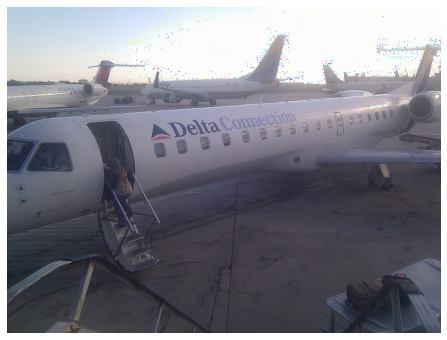

In [173]:
image = noisyTreatment(noisy[1])
plt.figure(figsize=(18, 6))
plt.axis('off')

plt.imshow(image)


In [174]:
# k = np.array([[0,0,0],[0,1,0],[0,0,0]])

# laplacianImage = laplacianOperation(image)
# plt.figure(figsize=(18, 6))
# plt.axis('off')

# plt.imshow(laplacianImage)

# sharpenedImage = noisy[1] - laplacianImage
# plt.imshow(sharpenedImage)
# plt.show()
